# 워드클라우드 설치
Anaconda prompt를 실행하고 'pip install wordcloud'를 입력한다.

## 워드클라우드 1. 영어 문서

(-0.5, 1919.5, 1079.5, -0.5)

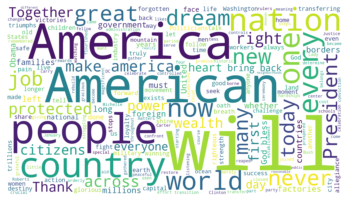

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 텍스트 파일 열기 (트럼프 대통령 취임사)
text = open('usa_president_message.txt', encoding='UTF-8').read() # 파이썬 내장함수인 open() 함수를 이용하여 파일을 열고,
                                                                    # read() 메서드를 이용하여 텍스트를 읽는다.

# 워드 클라우드 이미지 생성하기
wordcloud = WordCloud(background_color='white', # 배경 색 지정
                      width=1920,height=1080 # 이미지 크기 지정
                     ).generate(text) # generate() 메서드에 텍스트 문자열을 입력하면 단어 개수를 계산하여 워드클라우드 객체를 만든다.

# 화면에 출력하기
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear', cmap='YlOrBr') # inshow() 함수를 이용하여 그림 객체에 워드클라우드 이미지를 그린다.
                                                                # interpolation(이미지 보간법) : 이미지의 부드럽기 정도
                                                                # cmap: 색깔지정
        
plt.axis('off') # 그래프의 가로축, 세로축을 표시하지 않도록 하는 명령

https://khann.tistory.com/60

## 워드클라우드 이미지 마스킹 처리하기

(-0.5, 1279.5, 777.5, -0.5)

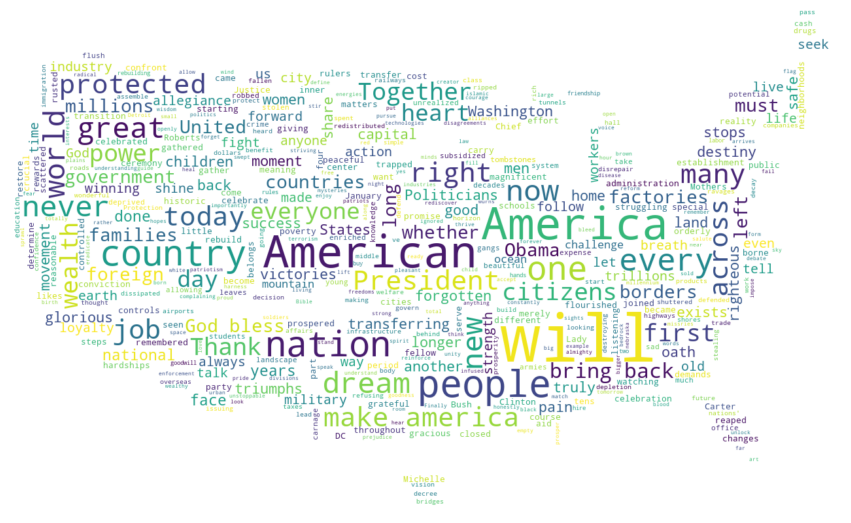

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 텍스트 파일 열기
text = open('usa_president_message.txt', encoding='UTF-8').read()

# 이미지 마스킹 처리
image_path = 'usa_map.jpg' # PIL 라이브러리의 Image 모듈을 사용하여 워드클라우드 이미지의 기본 형태로 사용할 마스크 이미지를 불러온다.
usa_map = np.array(Image.open(image_path)) # 이미지 파일을 numpy array로 변환한 값을 usa_map 변수에 저장

# 워드 클라우드 이미지 생성하기
wordcloud = WordCloud(background_color='white', 
                      max_font_size = 100,
                      max_words=1000, # 최대로 포함할 수 있는 단어 수
                      stopwords=STOPWORDS,# Stopwords 는 빈도수를 계산할 때 제외되는 단어입니다. 
                                          #영어에서 자주 이용되는 stopwords 는 wordcloud.STOPWORDS 저장되어 있다.
                      mask=usa_map
                     ).generate(text)

# 화면에 출력하기
fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## 워드클라우드 2. 한글 문서
한글 형태소의 명사, 동사 등 품사를 구분하여 추출하기 위해서는 NLP를 사용한다. 대표적인 파이썬 한국어 NLP인 KoNLPy를 설치한다.

다소 복잡한 과정이라 생략

https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/

# 레이더 차트(방사형 차트)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# 데이터  로딩 ( KBO 프로야구 1위팀, 10위 팀의 성적 데이터)
kbo = pd.read_csv("kbo.csv")
kbo.head()

,팀명,승리,패배,세이브,홀드
0,1위 팀,88,55,51,92
1,10위 팀,48,93,16,47


In [6]:
# 변수 지정
var = kbo.columns.to_list()[1:] # '승리' 열부터 이후에 위치하는 모든 열을 선택하여 리스트로 변환
print(var)

['승리', '패배', '세이브', '홀드']


In [13]:
# 1위 팀 값 지정 
val1 = kbo.loc[0, :].drop('팀명').values.tolist()
val1.append(val1[0]) # 레이더 차트가 중간에 끊기지 않고 극좌표에서 고리 형태로 연결되도록 0행의 첫번째 값인 88을 리스트에 추가한다.
print(val1)

# 10위 팀 값 지정 
val2 = kbo.loc[1, :].drop('팀명').values.tolist()
val2.append(val2[0])
print(val2)

[88, 55, 51, 92, 88]
[48, 93, 16, 47, 48]


In [29]:
# 변수별 각도 계산
num_var = len(var) # 차트에 그릴 변수의 개수 구하기
deg = [n / float(num_var) * 2 * pi for n in range(num_var)] # 원의 각도(2π=360°)를 라디안으로 나타내고 변수의 개수로 나눈다.
deg.append(deg[0])
print(deg)

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


In [30]:
# matplotlib 한글 폰트 오류 문제 해결 -> 복붙
from matplotlib import font_manager, rc
font_path = "malgun.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

(0, 100)

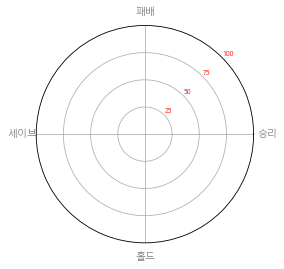

In [45]:
 # 레이더 차트 그리기
ax = plt.subplot(111, polar=True) # 극좌표를 사용하기 위해 polar = True
plt.xticks(deg[:-1], var, color='grey', size=10) # 변수 4개의 값을 x축의 값으로 표시한다. 폰트 색은 그레이, 사이즈 10
 
ax.set_rlabel_position(45) # 극좌표의 반경(radial)을 나타낼 각도를 45도로 지정한다.
plt.yticks([25,50,75,100], ["25","50","75","100"], color="red", size=7) 
plt.ylim(0,100) # 반경을 나타내는 y축 값의 범위

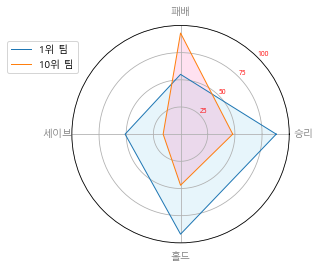

In [54]:
 # 레이더 차트 그리기
ax = plt.subplot(111, polar=True) # 극좌표를 사용하기 위해 polar = True
plt.xticks(deg[:-1], var, color='grey', size=10) # 변수 4개의 값을 x축의 값으로 표시한다. 폰트 색은 그레이, 사이즈 10
 
ax.set_rlabel_position(45) # 극좌표의 반경(radial)을 나타낼 각도를 45도로 지정한다.
plt.yticks([25,50,75,100], ["25","50","75","100"], color="red", size=7) 
plt.ylim(0,100) # 반경을 나타내는 y축 값의 범위

ax.plot(deg, val1, linewidth=1, linestyle='solid', label='1위 팀')
ax.fill(deg, val1, 'skyblue', alpha=0.2) # fill은 내부 영역을 색으로 채우는 함수

ax.plot(deg, val2, linewidth=1, linestyle='solid', label='10위 팀')
ax.fill(deg, val2, 'hotpink', alpha=0.2)

plt.legend(loc='best', bbox_to_anchor=(0.05, 0.95)) # bbox_to_anchor 옵션은 범례 상자가 위치하는 절대 좌표를 지정한다.
                                                    # (0.05, 0.95)는 가로 방향으로 0.5, 세로 방향으로 0.95 위치를 나타낸다.
                                                    # 따라서 화면의 왼쪽 상단에 위치한다.

# 채색 달력 그래프 (calmap)
채색 달력 그래프는 일별 데이터 값을 달력에 다른 색으로 구분하여 표현한 그래프를 말한다.

Anaconda prompt를 실행하고 'pip install calmap'를 입력한다.

In [63]:
import pandas as pd
import calmap
import matplotlib.pyplot as plt

# KOSPI 데이터 준비 (2018년 kospi 주가 지수 일별 데이터)
df = pd.read_excel('kospi.xls', parse_dates=['년/월/일'])
df.head()

,년/월/일,종가,대비,등락률(%),시가,고가,저가,거래량(천주),거래대금(원),상장시가총액(원)
0,2018-12-28,"2,041.04",12.60,0.62,"2,036.70","2,046.97","2,035.41","352,678","4,120,695,824,217","1,343,971,857,985,694"
1,2018-12-27,"2,028.44",0.43,0.02,"2,032.09","2,035.57","2,021.39","398,021","5,351,003,742,272","1,335,555,861,715,532"
2,2018-12-26,"2,028.01",-27.00,-1.31,"2,028.81","2,037.83","2,014.28","321,499","5,424,078,195,801","1,336,757,289,211,058"
3,2018-12-24,"2,055.01",-6.48,-0.31,"2,050.38","2,059.94","2,046.18","285,275","3,843,849,185,884","1,352,900,455,817,700"
4,2018-12-21,"2,061.49",1.37,0.07,"2,052.70","2,061.51","2,049.76","311,389","5,492,537,998,707","1,357,352,795,408,644"


In [64]:
df.columns = ['date', 'price', 'up_down', 'change', 'start', 'high', 'low', 
              'vol_num', 'vol_amt', 'mkt_cap']
df = df.set_index('date', drop=True)
df.head()

,price,up_down,change,start,high,low,vol_num,vol_amt,mkt_cap
date,,,,,,,,,
2018-12-28,"2,041.04",12.60,0.62,"2,036.70","2,046.97","2,035.41","352,678","4,120,695,824,217","1,343,971,857,985,694"
2018-12-27,"2,028.44",0.43,0.02,"2,032.09","2,035.57","2,021.39","398,021","5,351,003,742,272","1,335,555,861,715,532"
2018-12-26,"2,028.01",-27.00,-1.31,"2,028.81","2,037.83","2,014.28","321,499","5,424,078,195,801","1,336,757,289,211,058"
2018-12-24,"2,055.01",-6.48,-0.31,"2,050.38","2,059.94","2,046.18","285,275","3,843,849,185,884","1,352,900,455,817,700"
2018-12-21,"2,061.49",1.37,0.07,"2,052.70","2,061.51","2,049.76","311,389","5,492,537,998,707","1,357,352,795,408,644"


In [124]:
df

,price,up_down,change,start,high,low,vol_num,vol_amt,mkt_cap
date,,,,,,,,,
2018-12-28,"2,041.04",12.60,0.62,"2,036.70","2,046.97","2,035.41","352,678","4,120,695,824,217","1,343,971,857,985,694"
2018-12-27,"2,028.44",0.43,0.02,"2,032.09","2,035.57","2,021.39","398,021","5,351,003,742,272","1,335,555,861,715,532"
2018-12-26,"2,028.01",-27.00,-1.31,"2,028.81","2,037.83","2,014.28","321,499","5,424,078,195,801","1,336,757,289,211,058"
2018-12-24,"2,055.01",-6.48,-0.31,"2,050.38","2,059.94","2,046.18","285,275","3,843,849,185,884","1,352,900,455,817,700"
2018-12-21,"2,061.49",1.37,0.07,"2,052.70","2,061.51","2,049.76","311,389","5,492,537,998,707","1,357,352,795,408,644"
...,...,...,...,...,...,...,...,...,...
2018-01-08,"2,513.28",15.76,0.63,"2,510.70","2,515.37","2,494.18","311,429","6,404,885,697,956","1,634,777,680,824,259"
2018-01-05,"2,497.52",31.06,1.26,"2,476.85","2,497.52","2,475.51","308,770","6,317,518,427,311","1,624,970,533,116,195"
2018-01-04,"2,466.46",-19.89,-0.80,"2,502.50","2,502.50","2,466.45","333,836","6,896,287,056,563","1,604,916,139,690,676"


<Figure size 1152x576 with 0 Axes>

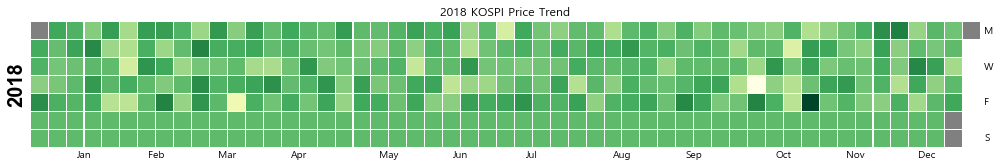

In [130]:
# Calendar Map 표현
plt.figure(figsize=(16,8))
calmap.calendarplot(df['change'], # 'change' 열을 데이터로 선택
                    monthticks=1, # 1~12월의 이름을 표시하는 간격을 나타낸다. 1로 설정하면 모든 월 이름을 표시한다.
                    daylabels='MTWTFSS', # 월~일까지 요일명을 나타내는 형식
                    dayticks=[0, 2, 4, 6], # 요일명을 표시하는 간격. 0,2,4,6번째 위치에 해당하는 월,수,금,일 표시
                    cmap='YlGn', linewidth=0.05, fillcolor='gray', # cmap은 컬러맵, linewidth는 구분선의 두께, fillcolor는 누락치가 있을 때 해당 칸을 표시하는 색
                    fig_kws=dict(figsize=(14, 6)), # 채색 달력 그래프의 크기 설정
                    yearlabel_kws=dict(color='black', fontsize=20), # 연도 표시 형식 지정 
                    subplot_kws=dict(title='2018 KOSPI Price Trend'),# 제목 표시                        
                    )

plt.show()